**Student name and BC username**


**Collaborators names and BC usernames (max 2 collaborators)**


# <font face = "times"><center>  EC1151 - Homework 9 - Due Nov 11th, 3PM</font> 

<font face="times">
# Instructions
<br>

+ You must fill out this Jupyter notebook and return it by e-mail to baisihad@bc.edu

+ Double click on the cells to edit them

+ For questions that need mathematical notation, try to use $\LaTeX$ if you can.

+ Sometimes, below a question that requires an answer there will be a cell with several `assert` statements. If you can run that cell without generating error, your answer has been validated and you are guaranteed the points.

+ If you're stuck, try posting a question in the Piazza forum. Active contributors will be rewarded.

+ Finally, this is <b>experimental</b>. I'd love to hear what you think about this homework format. You can e-mail me with your thoughts, or (preferrably) post in the Piazza forum (possibly anonymously to your peers).

<font face="times">

<font size=3>This homework is graded out of <font color="purple"><b>115</b></font> points.

---

I'll import all the libraries you may need ahead. (<font color="red">Run the cell below!</font>)

In [9]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

---

## More Transformations [20 points]

**Q1)** Find the CDF and PDF of the random variable $Z$ below.

<font size = 1>Writing out all the $\LaTeX$ will probably take a long time. If you want you can just write down the answer without the derivation. Just make sure you understand it yourself!</font>

a) $X \sim Expo(1)$ and $Z = e^{-X}$

b) $X \sim Unif[0,1]$ and $Z = U^2$

c) $X \sim Binom(3, \frac{1}{2})$ and $Z = sin(X)$.

d) $X \sim N(0,1)$ and $Z = X^2$  

The last one is the most important: the resulting distribution is the **$\chi^2$ distribution**!

---

## Conditional Expectation given Events [60 points]

**Q2)** Imagine that next week I begin my lecture with this.

> "I'm a little depressed, guys. I'm almost 29 years old, and I'm a Brazilian male. Wikipedia says that the life expectancy of Brazilian males is about 72 years. So if I'm an average Brazilian, I've lived 40% of my life already!"

Your task in this exercise is to cheer me up a little.

a) Let's model Brazilian male lives as $X \sim Exponential(\lambda)$. What is the appropriate $\lambda$, according to the data above?

b) What is the probability that a random Brazilian male will live at least 72 years?

c) What is the CDF of a Brazilian male lifespan, *conditioning on* him having already lived 29 years? (i.e., what is the probability that a random Brazilian male *that has already lived to age 29* will live *at most* $x$ years?)

d) Use your answer to $c$ to find the conditional probability *density* given $X \geq 29$.

e) To compute my *conditional* life expectancy we'd have to compute the following integral:

$$E[X \  | \  X \geq 29] = \int_{29}^{\infty} x \ f_{X|X\geq 29}(x) \ dx$$

where $f_{X|X\geq 29}(x)$ is the PDF you found in part d. But integrals are so hard! Let's find out the answer by simulation instead.

+ Draw 10000 numbers from $Exponential(\lambda)$

+ Discard all numbers that are smaller than 29.

+ Take the mean of the remaning numbers.

The number you get is a Monte-Carlo approximation to the integral above, and it is your estimate of my life expectancy. (Note: as you'll see, the number you'll find is a bit too optimistic. That's because lifespans are not very well-modelled by the Exponential distribution.)

---

**Q3)** In your next summer internship, you're working as a research assistant for a professor who studies Crime Economics. For her next paper the professor interested in knowing how often a random person gets arrested in the last 10 years, on average, in Boston. So if $X$ is the number of times anyone gets arrested, then you're looking for $E[X]$.

You're given anonymized police records for Boston containing an ID and the number of times each person has been arrested. However, people who have never been arrested do not show up in these records. In statistical parlance, your data has **selection bias**.

a) Suppose that $X \sim Poisson(\lambda)$. Then I claim that:

$$P( \ X = k \ | \ X \geq 1 \ ) = \frac{e^{-\lambda} \lambda^{k}}{(1 - e^{-\lambda})k!} \qquad \text{ for } \ k  = 1,2,\cdots $$

Prove my claim.

b) If we knew $\lambda$, we could find the conditional expeectation of $X$ *given that a person has been arrested before*, by computing

$$E[\ X \ | \ X \geq 1 \ ] = \sum_{k = 1}^{\infty} k \cdot P( \ X = k \ | \ X \geq 1 \ )$$

But infinite sums are hard! So let's again let ourselves be lazy and appeal to Python.

+ Take any given $\lambda$, say $\lambda = 3$.

+ Draw 10000 numbers from $Poisson(\lambda)$

+ Keep only draws that are 1 or greater.

+ Take the mean of the numbers you kept.


c) Let's use a toy data set. Suppose `x` below contains the number of times each person in the record has been arrested. 

In [ ]:
x = np.array([1, 5, 2, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2,
       2, 1, 1, 2, 2, 3, 2, 2, 1, 1, 4, 1, 1, 3, 1, 2, 1, 1, 3, 2, 3, 1, 2,
       2, 3, 1, 2, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2])

Assume that these data came from $Poisson(\lambda)$, but observations equal to "0" were discarded. Guess the value of $\lambda$ that is most likely to have generated the data above.

**Note** What you're doing in part "c" is finding the **Maximum Likelihood Estimator** (MLE) of $\lambda$. I.e., the "most likely value of $\lambda$ to have generated the data". Of course, there are more principled methods to find the MLE than the guess-and-verify process above. We'll talk about them soon!

---

## Conditional Expectation given other rvs + Covariance [20 points]

**Q4)** Consider the *joint probability* given in the table below.

<img src="table.png" width = 250>

a) What is $P(Y = 2 | X = 2)$?

b) What is E[Y| X = 1]?

c) What is $E[Y | X \geq 2]$?

d) What is Cov(X,Y)?

e) What is Corr(X,Y)?

---

## Extra [15 points]

The file `data.csv` contains monthly data on unemployment and inflation in the United States since 1948.

In [5]:
import pandas as pd
data = pd.read_csv("data.csv", index_col = "date")
data.head(4)

,unemp,inflation
date,,
1948-01-01,3.4,13.76103
1948-02-01,3.8,-0.50686
1948-03-01,4.0,-8.64960
1948-04-01,3.9,16.23017


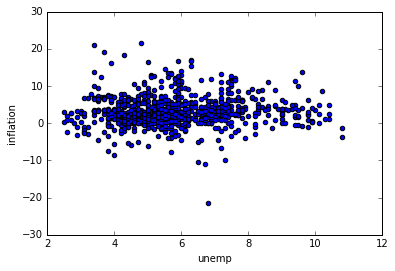

In [6]:
data.plot(kind = "scatter", x = "unemp", y = "inflation")

Your challenge this week is to follow the instructions in Day27 and estimate $E[ \ Inflation \ | \ Unemploment \ ]$, using one method of your choice.

As a final result you should produce a scatterplot of the two variables, and overlay on that your estimate of the conditional mean. You don't need to copy all of the graphs below, just one of them will suffice for full points (but I'll be happy to help you during the office hours if you want to do all of them!).
 

### 1) Discretizing

One way of doing this is to round unemployment to the nearest integer, thus making it a discrete variable (this process is called "discretizing"). Then you can compute the conditional mean of inflation at each integer level of unemployment. The result should look like this.

<img src="extra1.png" width = 600>

### 2) Linear Regression

Another way to do it is to assume that $E[Y|X=x]$ is a *linear* function of $x$, as in:

$$g(x) = E[Y|X = x] = a + bx$$

Then you "just" have to find the proper $a, b$.

<img src="extra2.png" width = 600>


### 3) K-Nearest Neighbors Regression

One very common tool for nonparametric regression is *K-Nearest Neighbors*. Essentially, whenever we want to know $g(5) = E[Y|X=5]$ (say), we just look at the $K$ values of $X$ closest to $5$ in our data, and take the mean of the values of $Y$ associated with those points. The machine learning library `scikit-learn` (or `sklearn`) has a canned routine that you can use, if you like. For $K = 20$, the result looks like this.

<img src="extra3.png" width = 600>

### 4) Any other way

Feel free to explore the world of regression for inspiration, or come up with your own algorithm. Good luck!